In [ ]:

pip install tabulate

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from tabulate import tabulate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [6]:
df = df.dropna(subset=['Temperature (C)'])
numerical_df = df.select_dtypes(include='number')
X = numerical_df.drop(columns=['Temperature (C)'])
y = numerical_df['Temperature (C)']
df.dropna(inplace=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
regressors = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "kNN": KNeighborsRegressor(n_neighbors=5),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}
results = {}
for name, model in regressors.items():
    model.fit(X_train, y_train)  # Fit the model
    y_pred = model.predict(X_test)  # Make predictions
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {'MSE': mse, 'R^2': r2}
    print(f"{name}:\n Mean Squared Error: {mse:.2f}\n R² Score: {r2:.2f}\n")
best_model = max(results, key=lambda k: results[k]['R^2'])
print(f"The best  Regression model is: {best_model}")



Linear Regression:
 Mean Squared Error: 0.90
 R² Score: 0.99

Decision Tree:
 Mean Squared Error: 0.01
 R² Score: 1.00

kNN:
 Mean Squared Error: 0.93
 R² Score: 0.99

Random Forest:
 Mean Squared Error: 0.00
 R² Score: 1.00

The best  Regression model is: Random Forest


In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)

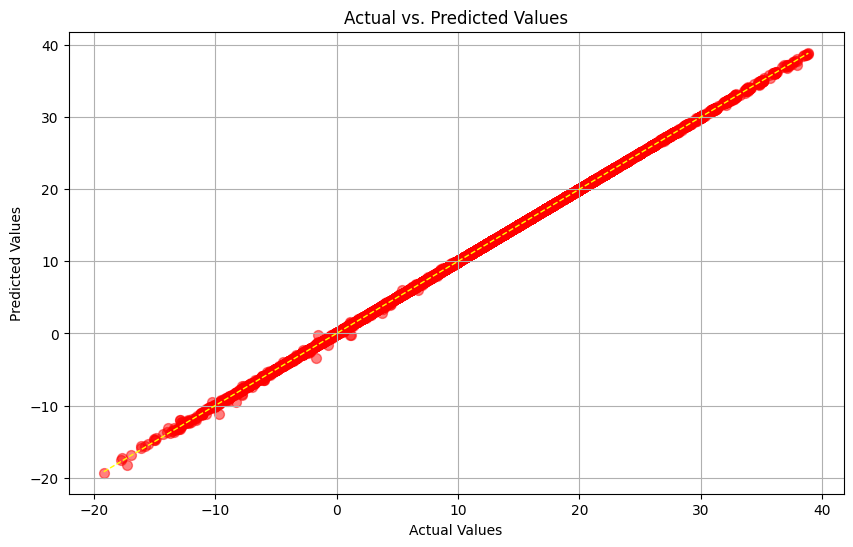

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.5, s=50, marker='o')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='yellow', linestyle='--', linewidth=1)
# Adding labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


1. What type of machine learning problem is this?
This is a supervised machine learning problem (linear regression)
algorithm : Random Forest

2. How do the features relate to each other and to the
weather conditions?
Humidity: Affects temperature readings.
Cloud Cover: More cloud cover can lead to lower temperatures by blocking sunlight.
Wind Speed: Wind can influence the perceived temperature by increasing heat loss from the body, leading to a lower apparent temperature.
Pressure: Influences temperature variations,typically, higher temperatures are associated with lower pressure, and vice versa

3. What are the steps involved in preprocessing the dataset for machine learning?
Data Cleaning: Handling missing values 
Data Selection: Extract relevant features or select a subset of features to improve model performance.
Data Splitting: Divide the dataset into training, validation, and test sets to evaluate the model’s performance.

4.How do we select the best model for our dataset?
Test regression models like Linear Regression, KNN, Decision Tree, and Random Forest.
merrics : MSE and R-squared 
The best model will have an MSE value closer to zero or the smallest one and maximum R square value.

5. What metrics should we use to evaluate the performance of our weather prediction model?
Mean Squared Error (MSE): is used to evaluate the performance of regression models.  It measures the average squared difference between the predicted and the actual target values within a dataset.
R-squared (R²): it is valuable for understanding the overall fit of the model.